# Airbnb Sicilia
## Review of Sicilian airbnb hosts and listings


#### Datasources:
- Main website link: https://www.airbnb.com/
- http://insideairbnb.com/sicily
- http://data.insideairbnb.com/italy/sicilia/sicily/2022-03-29/data/listings.csv.gz

# 1. Business Understanding

> **Airbnb Inc.** is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking.
> <u>Source<u>: https://en.wikipedia.org/wiki/Airbnb

> **Inside Airbnb** is an investigatory/watchdog website launched by Murray Cox in 2016. It reports and visualizes scraped data on the property rental marketplace company Airbnb, focusing on highlighting illegal renting on the site and gentrification caused by landlords buying properties to rent on Airbnb.
> <u>Source<u>: https://en.wikipedia.org/wiki/Inside_Airbnb


> **Inside Airbnb** is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. We work towards a vision where data and information empower communities to understand, decide and control the role of renting residential homes to tourists.
> <u>Source<u>: http://insideairbnb.com/about/

## 1.1 Motivation
The following study has been performed on the back of the Data Scientist NanoDegree project about the CRISP-DM project. <br>

One of the suggested assignments was to use AirBnb Seattle data (originally from a Kaggle competition https://www.kaggle.com/datasets/airbnb/seattle) but right after I found data from my Sicily were available, I decided to work on it.

I know my Island well and I have a general understand of how hosts work as I usually rent an holiday house for my family when travelling back from where I live.

I am generally interested in success factors for good hosts, hoping that this guide can be useful to people that are trying to improve or break into the business.

The work that can be done with the amount of data provided is various. I will limit the amount of explanatory statistics to the bare minimum and the predictive modeling to a Ordinary Least Square linear model.

For such a publication, the most important thing is to provide "food for thoughts". I will keep a rather informal profile (we can keep formality to day-by-day work, this is just a game for me) so I hope you'll enjoy.

## 1.2 Business: Airbnb and home renting in Sicily
Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app (source https://en.wikipedia.org/wiki/Airbnb)

In Sicily, Airbnb publishes 51,000+ listings. The vast majority is for entire homes or apartments, the rest is for private rooms. Some top level analysis can be found here: http://insideairbnb.com/sicily

The Sicilian coast line is densily populated, as well as some internal areas, especially during the summer period. It is quite common to own a holiday house. During the past few years, pushed by increasing taxes on property, economic depression and the increased availability of listing platforms on the internet (see Booking.com, Airbnb.com, etc) it is more and more common to rent those properties as a form of secondary income.

Considering Sicily is a big tourism attraction (more than 2 millions bookings in 2021, https://www.guidasicilia.it/notizia/nel-2021-la-sicilia-ha-trainato-il-turismo-italiano/3014341) it is clear there are a large number of hosts for whom tourist is the main form of business.

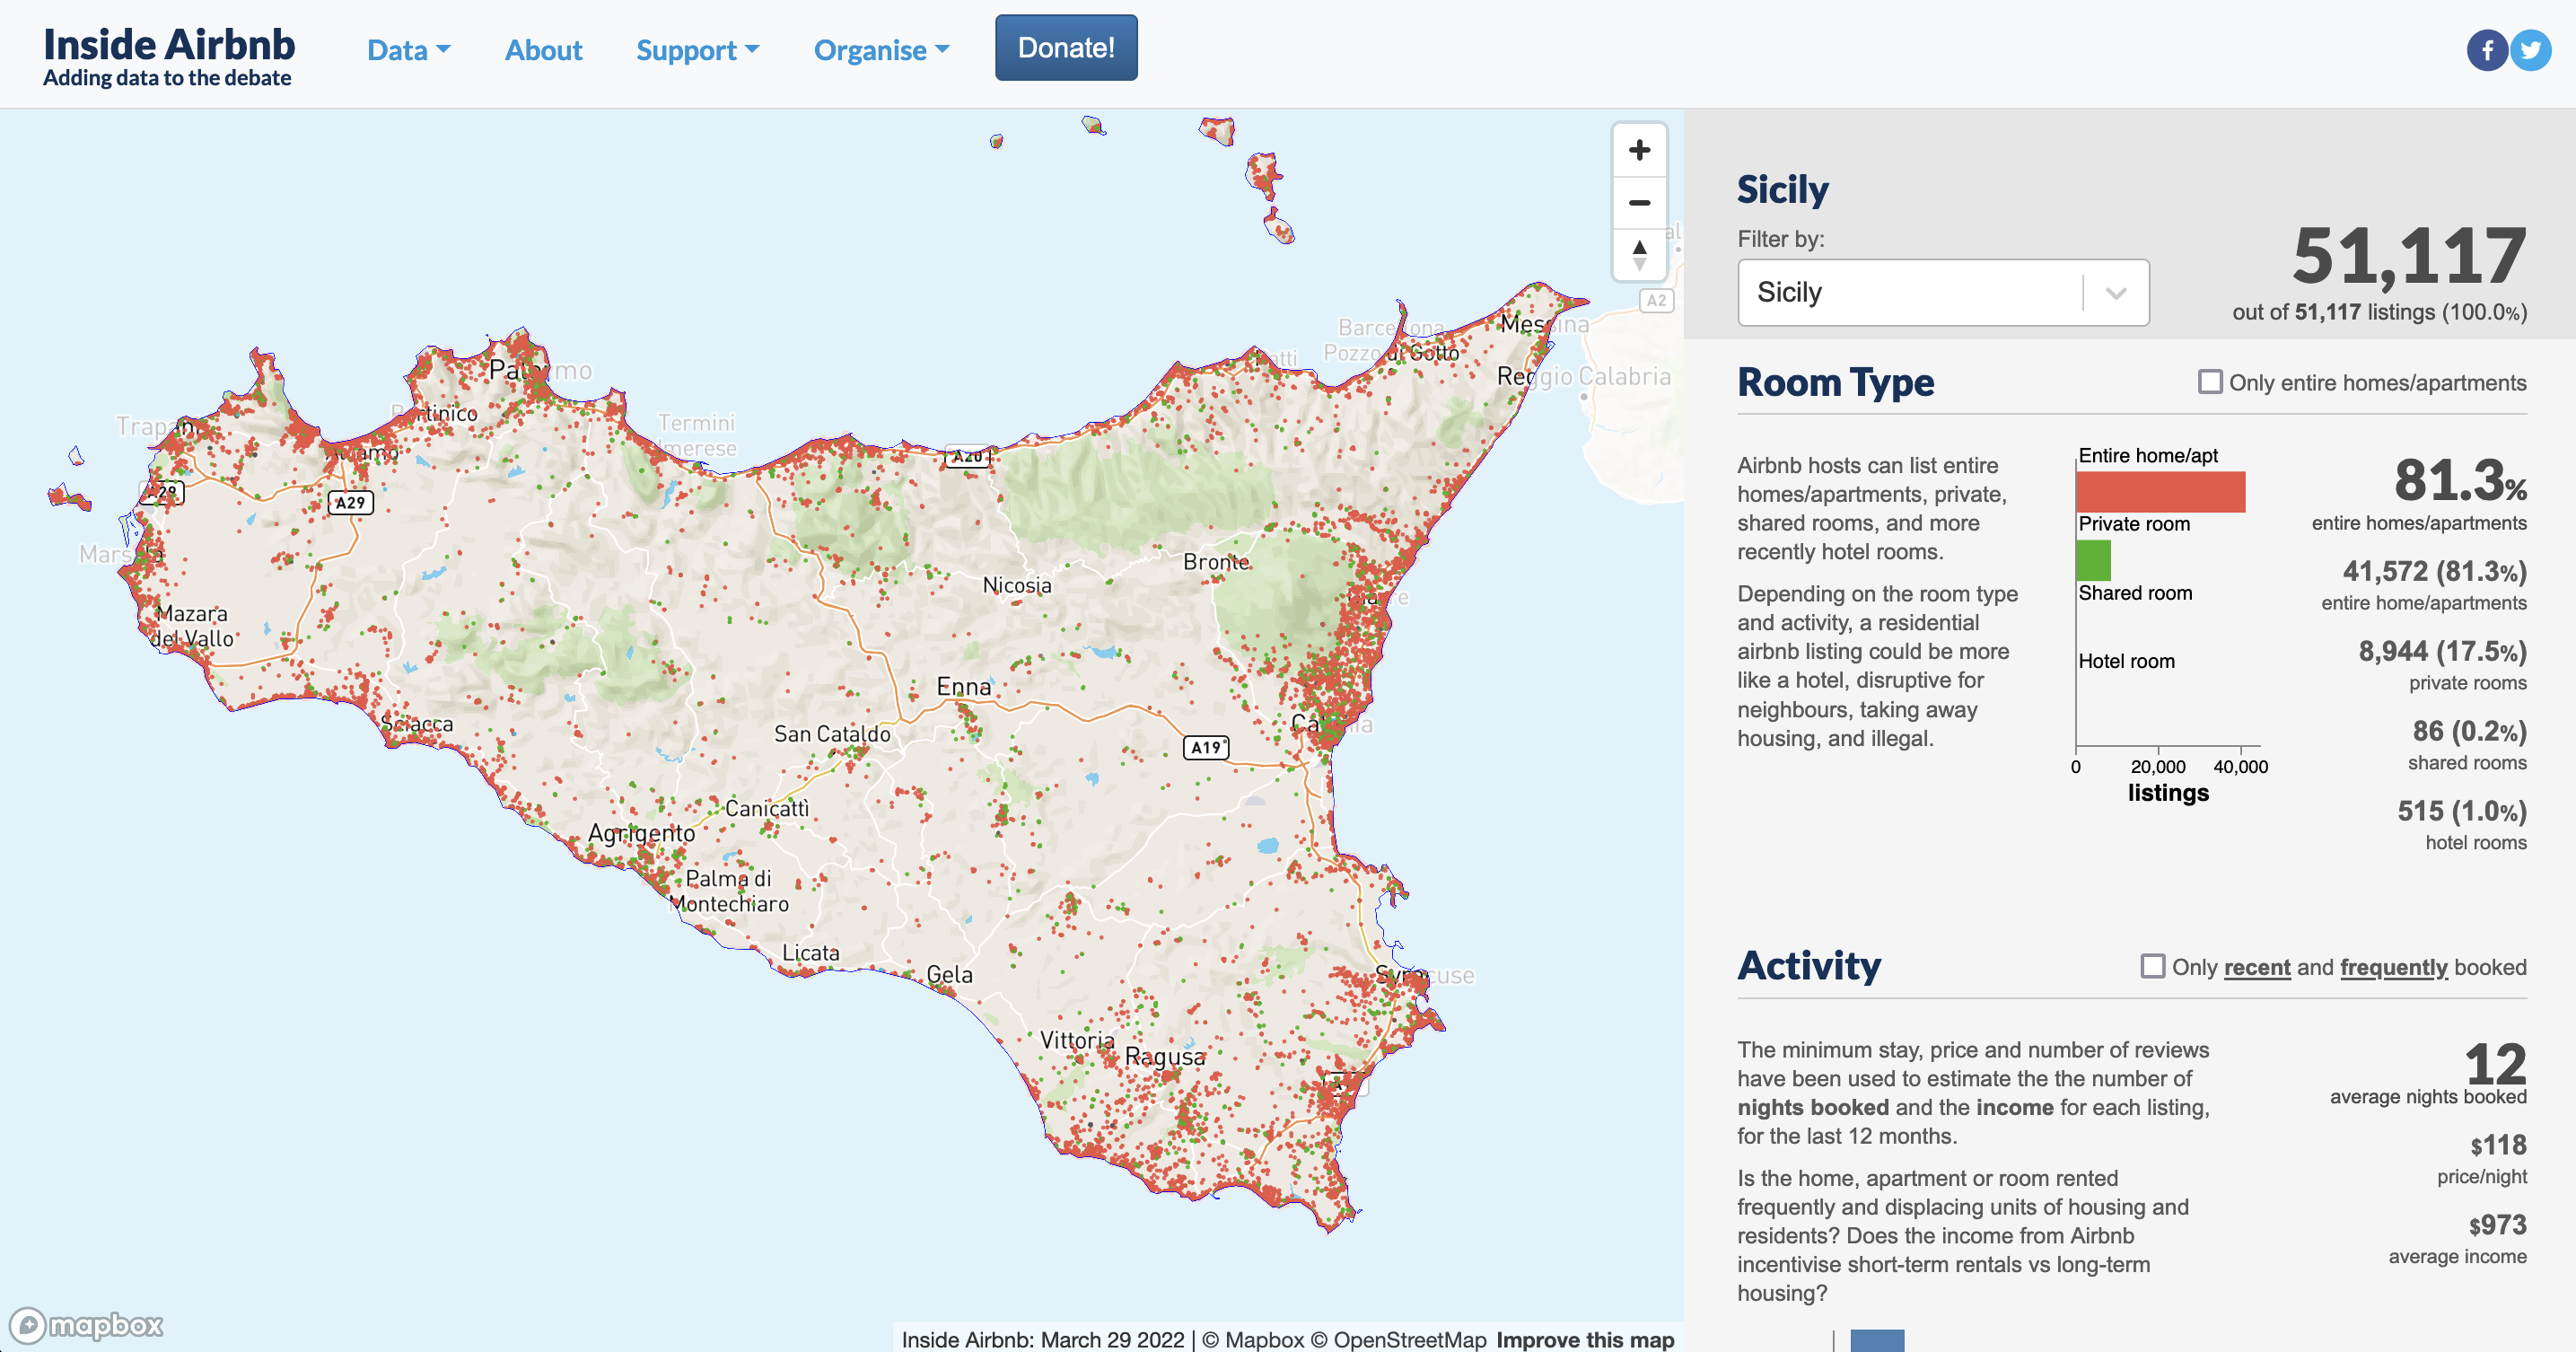

## 1.3 Scope
With the following study, we will aim to understand and model the driving factors for a successful Airbnb listing or host.

Our underlying assumption is that the success is independent from the location, hence we will not consider either the neighborhood or the cardinal coordinates as a factor for success.

This is not necessarily true as some areas might benefit from the neighborhood situation (cleaness, services in general, the vicinity to features such as an airport or some cultural/natural sites etc).

## 1.4 Key Performance Indicator KPI

For the purposes of this study, we will consider the number of reviews as a direct indication of the number of visitors hence it will be related to the success of sales.

As there are few variables linked to the number of reviews, we will consider which one is the most appropriate.

# 2. Data undestanding and preparation

In [1]:
# import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 2.1 Gathering

Data in csv format, downloaded from http://data.insideairbnb.com/italy/sicilia/sicily/2022-03-29/data/listings.csv.gz

In [2]:
df = pd.read_csv('./2022/listings.csv') #load the dataset

## 2.2 Dataset overview (dictionary)
The dataset consists in 74 attributes of more than 50.000 listings of Airbnb holiday houses in the island of Sicily. Data has been last scraped at the end of Mar-2022.
    
A dictionary file for the listing data can be found at the link below in Spreadsheet format <br>
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

## 2.3 Assessment

In [3]:
print('The dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe contains 51117 rows and 74 columns


In [4]:
duplicates = df.shape[0] - df['id'].nunique()
print('The dataframe contains {} duplicates'.format(duplicates))

The dataframe contains 0 duplicates


In [5]:
print(df['last_scraped'].value_counts()) # to print when was the data scraped last

2022-03-30    27661
2022-03-31    15415
2022-03-29     8041
Name: last_scraped, dtype: int64


It was scraped last at the end of March 2022

In [6]:
print('Here''s a list of the dataframe colums: \n')
df.info()

Heres a list of the dataframe colums: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51117 entries, 0 to 51116
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            51117 non-null  int64  
 1   listing_url                                   51117 non-null  object 
 2   scrape_id                                     51117 non-null  int64  
 3   last_scraped                                  51117 non-null  object 
 4   name                                          51114 non-null  object 
 5   description                                   49891 non-null  object 
 6   neighborhood_overview                         27187 non-null  object 
 7   picture_url                                   51117 non-null  object 
 8   host_id                                       51117 non-null  int64  
 9   host_url             

In [7]:
pd.set_option('display.max_columns', None) # remove restriction on the number of plotted columns
df.sample(5) # print a random sample of 5 listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
45838,51354767,https://www.airbnb.com/rooms/51354767,20220329142659,2022-03-31,IL CAVALLUCCIO-Giardini Naxos,Il Cavalluccio è situato in pieno centro a poc...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,365448955,https://www.airbnb.com/users/show/365448955,Luca,2020-09-01,IT,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,0.0,0.0,['phone'],f,t,NaN,Giardini-Naxos,NaN,37.83505,15.27031,Entire home,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Air conditioning...",$175.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,28,303,2022-03-31,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
5810,6133101,https://www.airbnb.com/rooms/6133101,20220329142659,2022-03-30,Appartamento Valle dei Templi - Realmonte,Bivano sito a Realmonte centro. vicinanza sple...,Centro storico. a pochimetri dal centro st...,https://a0.muscache.com/pictures/76434767/6800...,31816909,https://www.airbnb.com/users/show/31816909,Casa Vacanze,2015-04-23,US,NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/31816909/prof...,https://a0.muscache.com/im/users/31816909/prof...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Realmonte, Sicilia, Italy",Realmonte,NaN,37.30943,13.46204,Private room in rental unit,Private room,4,NaN,1 private bath,1.0,2.0,"[""Free parking on premises"", ""Building staff"",...",$79.00,2,30,2,2,30,30,2.0,30.0,NaN,t,29,59,89,364,2022-03-30,15,0,0,2015-08-15,2019-09-21,4.25,4.58,4.58,4.75,4.83,4.25,4.08,NaN,f,1,0,1,0,0.19
26305,31324120,https://www.airbnb.com/rooms/31324120,20220329142659,2022-03-30,Casa Thess-Taormina,Confortevole appartamento con terrazza e picco...,"La casa ha la vista sui tetti di Taormina, il ...",https://a0.muscache.com/pictures/8c01e43d-6efb...,126275316,https://www.airbnb.com/users/show/126275316,Rosa,2017-04-17,"Taormina, Sicily, Italy","Sono una pianista, mi dedico all'insegnamento ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a3589...,https://a0.muscache.com/im/pictures/user/a3589...,NaN,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,"Taormina, Sicilia, Italy",Taormina,NaN,37.85721,15.28624,Entire home,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Patio or balcony"", ...",$70.00,5,28,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,88,2022-03-30,8,0,0,2019-03-21,2020-09-10,5.00,4.88,5.00,5.00,5.00,5.00,5.00,NaN,t,1,1,0,0,0.22
32752,37733114,https://www.airbnb.com/rooms/37733114,20220329142659,2022-03-30,Casetta a Vulcano centralissima,Una villetta nel complesso del Residence al po...,NaN,https://a0.muscache.com/pictures/e4639720-c5a2...,199016318,https://www.airbnb.com/users

Before doing any assessment, as the dataset has a rather large number of column, we will start identifying those that could be of interest as:
- success indicator (dependent variable)
- success factor (independent variable)

In [8]:
print('the percentage of listings without description is {}%'.format(df['description'].isnull().sum()/df.shape[0]*100))

the percentage of listings without description is 2.398419312557466%


In [9]:
print('the percentage of listings without neighborhood overview is {}%'.format(df['neighborhood_overview'].isnull().sum()/df.shape[0]*100))

the percentage of listings without neighborhood overview is 46.81417141068529%


In [10]:
print('the percentage of listings without any picture is {}%'.format(df['picture_url'].isnull().sum()/df.shape[0]*100)) #find the number of listings without picture

the percentage of listings without any picture is 0.0%


In [11]:
df['host_since'].isnull().sum()

53

Since how long the host has joined the platform could be an interesting factor. We should revert it in the number of years, then fill the columns (#53) without data

In [12]:
print('the percentage of listings without any host description is {}%'.format(df['host_about'].isnull().sum()/df.shape[0]*100)) #find the number of listings without picture

the percentage of listings without any host description is 57.307744977209154%


In [13]:
df['host_response_time'].value_counts()

within an hour        22553
within a day           5709
within a few hours     5686
a few days or more     2347
Name: host_response_time, dtype: int64

This could be another interesting variable that we should better convert in an ordinal ("ordered categorical") variable.

What’s the difference between my response rate and acceptance rate?

    Your response rate measures how consistently you respond within 24 hours to guest enquiries and booking requests. You can find your response rate from the last 365 days by clicking on the Performance tab, then clicking Basic Requirements.
    Your acceptance rate measures how often you accept or decline reservations. Guest enquiries are not included in the calculation of your acceptance rate. You can find your response rate from the last 365 days by clicking on the Performance tab, then clicking Basic Requirements.
    
https://www.airbnb.co.uk/resources/hosting-homes/a/understanding-response-rate-and-acceptance-rate-86

In [14]:
print('the percentage of listings without host response rate is {}%'.format(df['host_response_rate'].isnull().sum()/df.shape[0]*100))

the percentage of listings without host response rate is 28.996224348064242%


In [15]:
print('the percentage of listings without host acceptance rate is {}%'.format(df['host_acceptance_rate'].isnull().sum()/df.shape[0]*100))

the percentage of listings without host acceptance rate is 15.20237885634916%


In [16]:
print('the percentage of superhosts is {}%'.format(df['host_is_superhost'].isnull().sum()/df.shape[0]*100))

the percentage of superhosts is 0.10368370600778605%


In [17]:
df['host_listings_count'].isnull().sum()

53

host_listings_count and host_total_listings_count show no difference. We can chose either, but we will have to fill the NaN somehow.

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

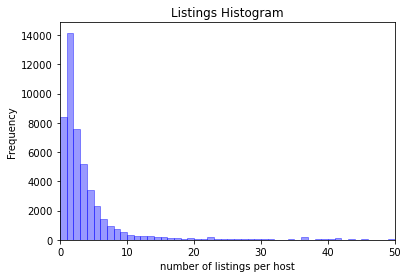

In [18]:
#df['host_listings_count'].hist(bins = 100)

plt.xscale('linear')
plt.xlim((0, 50))

# seaborn histogram
sns.distplot(df['host_listings_count'], hist=True, kde=False, 
             bins = range(0,1000), color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Listings Histogram')
plt.xlabel('number of listings per host')
plt.ylabel('Frequency')

Host_listings_count is quite skewed. We will fill it with the median.

In [19]:
df['host_listings_count'].median()

2.0

In [20]:
print(df['host_verifications'][10]) # print an example of host verification

['email', 'phone', 'google', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']


In [21]:
df['host_verifications'][10].count('\'')/2 # given the nature of variable,
# we will count the number of apostrophe to identify the number of verifications

9.0

In [22]:
df['host_identity_verified'].value_counts()

t    34799
f    16265
Name: host_identity_verified, dtype: int64

In [23]:
# pd.set_option('display.max_rows', None) # remove restriction on the number of plotted columns
df['property_type'].value_counts()

Entire rental unit                   17299
Entire home                           8335
Entire villa                          6262
Private room in bed and breakfast     3461
Entire condo                          3374
                                     ...  
Shared room in loft                      1
Entire resort                            1
Room in heritage hotel                   1
Shared room in boat                      1
Shared room in guest suite               1
Name: property_type, Length: 110, dtype: int64

this is far too detailed, we should better focus on the room type which has much lesser choices

In [24]:
pd.set_option('display.max_rows', None) # remove restriction on the number of plotted columns
df['room_type'].value_counts()

Entire home/apt    41572
Private room        8944
Hotel room           515
Shared room           86
Name: room_type, dtype: int64

In [25]:
df['bathrooms'].value_counts()

Series([], Name: bathrooms, dtype: int64)

In [26]:
df['bathrooms_text'].value_counts()

1 bath               28160
2 baths               8391
1 private bath        5855
1.5 baths             2523
3 baths               1776
1 shared bath         1217
2.5 baths              754
4 baths                677
5 baths                347
2 shared baths         227
3.5 baths              204
6 baths                163
1.5 shared baths       117
4.5 baths              114
7 baths                 89
5.5 baths               49
0 baths                 35
3 shared baths          32
8 baths                 32
0 shared baths          27
6.5 baths               23
10 baths                21
Half-bath               21
Shared half-bath        21
9 baths                 19
7.5 baths               19
2.5 shared baths        16
4 shared baths          14
5 shared baths           7
8.5 baths                7
11 baths                 7
Private half-bath        6
5.5 shared baths         5
9.5 baths                4
12 baths                 4
7 shared baths           3
16 baths                 2
4

In [27]:
df['accommodates'].value_counts()

4     15516
2     10479
6      7115
5      5593
3      5469
8      2224
7      1595
10      873
9       560
1       413
12      408
16      326
11      204
14      151
13      107
15       84
Name: accommodates, dtype: int64

In [28]:
df['bedrooms'].value_counts()

1.0     23922
2.0     16135
3.0      6425
4.0      1971
5.0       821
6.0       284
7.0       118
8.0        72
9.0        29
10.0       28
12.0        8
11.0        7
13.0        4
15.0        3
20.0        2
40.0        1
14.0        1
18.0        1
Name: bedrooms, dtype: int64

In [29]:
df[df['bathrooms_text'] == '30 baths']

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
51012,591181896071594006,https://www.airbnb.com/rooms/591181896071594006,20220329142659,2022-03-30,Incantevole appartamento vista panoramica su Ibla,"Immerso nel cuore di Ragusa Ibla, dichiarata P...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,296496364,https://www.airbnb.com/users/show/296496364,Carmelo,2019-09-20,IT,NaN,within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/5dea8...,https://a0.muscache.com/im/pictures/user/5dea8...,NaN,0.0,0.0,"['email', 'phone']",t,f,NaN,Ragusa,NaN,36.92811,14.739,Entire serviced apartment,Entire home/apt,16,NaN,30 baths,20.0,3.0,"[""Carbon monoxide alarm"", ""Washer"", ""Smoke ala...",$39.00,1,365,1,1,365,365,1.0,365.0,NaN,t,0,0,0,149,2022-03-30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


I need to find how to convert this into a number.
I will then divide it per the number of rooms (density of bathrooms variable) that should indicate the quality of the listing.

In [30]:
df['accommodates'].isnull().sum()

0

In [31]:
int(float(df['price'][1000].replace('$', '')))

115

In [32]:
price = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/gc/yt6k1wpx4zz1v70vzfj3pd7m0000gn/T/ipykernel_4215/2491978675.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


/var/folders/gc/yt6k1wpx4zz1v70vzfj3pd7m0000gn/T/ipykernel_4215/1677706418.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

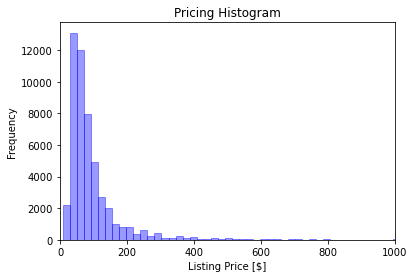

In [33]:
price = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

#df['host_listings_count'].hist(bins = 100)

plt.xscale('linear')
plt.xlim((0, 1000))

# seaborn histogram
sns.distplot(price, hist=True, kde=False, bins = 1000,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Pricing Histogram')
plt.xlabel('Listing Price [$]')
plt.ylabel('Frequency')


(0.0, 500.0)

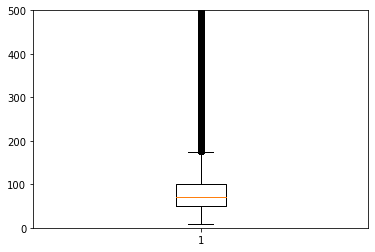

In [34]:
plt.boxplot(price);
plt.ylim(0,500)

In [35]:
price.describe()

count    51117.000000
mean       117.617642
std        479.297207
min          9.000000
25%         50.000000
50%         70.000000
75%        100.000000
max      21000.000000
Name: price, dtype: float64

We should better set some limits. We could work between the 25 and 75-th percentile, for instance.

We will limit the data by excluding ouliers with the following method.
Remove all times whose cost per night is below the "range" (Q1 - 1.5IQR, Q3+1.5IQLR).

in terms of dependent variables, we will consider the following
- number of reviews
- number of reviews in the past 12 months
- review_scores_rating 

In [36]:
df['maximum_nights_avg_ntm'].describe() # this variable is unuseable

count    5.111700e+04
mean     4.276909e+04
std      9.498325e+06
min      1.000000e+00
25%      9.000000e+01
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights_avg_ntm, dtype: float64

In [37]:
df['accommodates'].value_counts()

4     15516
2     10479
6      7115
5      5593
3      5469
8      2224
7      1595
10      873
9       560
1       413
12      408
16      326
11      204
14      151
13      107
15       84
Name: accommodates, dtype: int64

In [38]:
df['bedrooms'].value_counts()
#listings['bedrooms'].isnull().sum()

1.0     23922
2.0     16135
3.0      6425
4.0      1971
5.0       821
6.0       284
7.0       118
8.0        72
9.0        29
10.0       28
12.0        8
11.0        7
13.0        4
15.0        3
20.0        2
40.0        1
14.0        1
18.0        1
Name: bedrooms, dtype: int64

In [39]:
df['review_scores_rating'].describe()

count    34507.000000
mean         4.630309
std          0.705263
min          0.000000
25%          4.560000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


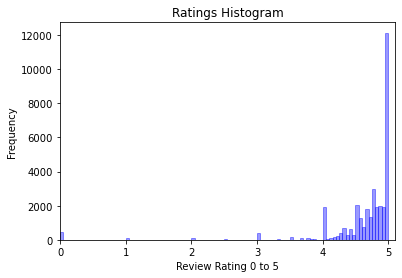

In [40]:
plt.xscale('linear')
plt.xlim((0, 5.1))

# seaborn histogram
sns.distplot(df['review_scores_rating'], hist=True, kde=False, bins = 100,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Ratings Histogram')
plt.xlabel('Review Rating 0 to 5')
plt.ylabel('Frequency');

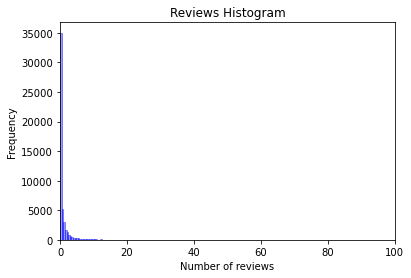

In [41]:
plt.xscale('linear')
plt.xlim((0, 100))

# seaborn histogram
sns.distplot(df['number_of_reviews_ltm']/df['accommodates'], hist=True, kde=False, bins = 100,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Reviews Histogram')
plt.xlabel('Number of reviews')
plt.ylabel('Frequency');

In [42]:
df[df['reviews_per_month'].isnull() == True].head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
12,46486,https://www.airbnb.com/rooms/46486,20220329142659,2022-03-29,"6 km from Siracusa,nature & comfort",<b>The space</b><br />In an ambiance of a simp...,NaN,https://a0.muscache.com/pictures/264695/916a77...,207959,https://www.airbnb.com/users/show/207959,La Frescura,2010-08-21,"Siracusa, Sicily, Italy","Salve, \r\nmi presento, sono Ida!\r\n...diffic...",NaN,NaN,67%,f,https://a0.muscache.com/im/users/207959/profil...,https://a0.muscache.com/im/users/207959/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Siracusa,NaN,37.06906,15.20910,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Heating"", ""Washe...",$105.00,3,730,3,3,730,730,3.0,730.0,NaN,t,30,60,90,365,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
13,46487,https://www.airbnb.com/rooms/46487,20220329142659,2022-03-29,Country house 6 km from Siracusa!,"Ideal compromise between the countryside, sea ...",NaN,https://a0.muscache.com/pictures/3304409/55674...,207959,https://www.airbnb.com/users/show/207959,La Frescura,2010-08-21,"Siracusa, Sicily, Italy","Salve, \r\nmi presento, sono Ida!\r\n...diffic...",NaN,NaN,67%,f,https://a0.muscache.com/im/users/207959/profil...,https://a0.muscache.com/im/users/207959/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Siracusa,NaN,37.07140,15.20486,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Heating"", ""Washe...",$100.00,3,365,3,3,365,365,3.0,365.0,NaN,t,30,60,90,365,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
17,49427,https://www.airbnb.com/rooms/49427,20220329142659,2022-03-29,"Sicilia, nel cuore del Val di Noto","Villa singola, su due piani, in parco privato ...",NaN,https://a0.muscache.com/pictures/285945/3b66f2...,225353,https://www.airbnb.com/users/show/225353,Ermanno E Daniela,2010-09-06,"Rome, Lazio, Italy","I think that every place is Home, and every ho...",within an hour,100%,50%,f,https://a0.muscache.com/im/users/225353/profil...,https://a0.muscache.com/im/users/225353/profil...,NaN,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Avola,NaN,36.94081,15.10258,Entire villa,Entire home/apt,12,NaN,2 baths,5.0,9.0,"[""Hot water"", ""Refrigerator"", ""Free parking on...",$75.00,7,365,7,7,365,365,7.0,365.0,NaN,t,28,58,88,363,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
21,57809,https://www.airbnb.com/rooms/57809,20220329142659,2022-03-29,Vacation rental Apt Taormina,<b>The space</b><br />Renting apartament in Ro...,NaN,https://a0.muscache.com/pictures/347498/930938...,70457,https://www.airbnb.com/users/show/

In [43]:
df['reviews_per_month'].isnull().sum()

16610

In [44]:
df['reviews_per_month'].describe()

count    34507.000000
mean         0.469456
std          0.710887
min          0.010000
25%          0.090000
50%          0.210000
75%          0.530000
max         10.770000
Name: reviews_per_month, dtype: float64

In [45]:
(df['number_of_reviews'] == 0).sum()

16610

In [46]:
(df['number_of_reviews'] == 0 | df['reviews_per_month'].isnull()).sum()

0

In [47]:
(df['number_of_reviews_ltm']/df['accommodates']).describe()

count    51117.000000
mean         0.878170
std          2.452691
min          0.000000
25%          0.000000
50%          0.000000
75%          0.666667
max         48.000000
dtype: float64

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


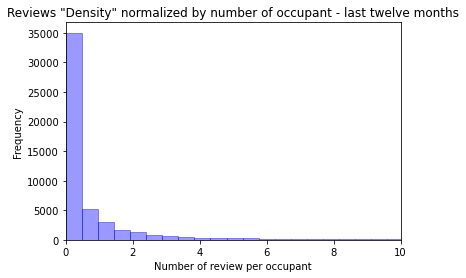

In [48]:
#g = df['number_of_reviews_ltm'].hist(bins = 100)

plt.xscale('linear')
plt.xlim((0, 10))
#plt.ylim((0, 10000))

# seaborn histogram
sns.distplot((df['number_of_reviews_ltm']/df['accommodates']), hist=True, kde=False, bins = 100,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Reviews "Density" normalized by number of occupant - last twelve months')
plt.xlabel('Number of review per occupant')
plt.ylabel('Frequency');

## 2.4 List of issues/prep actions
- description --> set to 1 if available, 0 otherwise <br>
- neighborhood_overview --> set to 1 if available, 0 otherwise <br>
- host_since <br>
    --> should be transformed in the number of days since the host has joined <br>
    --> 53 host do not have this info, we will fill it with the average <br>
- host_about --> set to one if the host description is available, 0 otherwise <br>
- host_response_time --> transform in an ordinal variable <br>
- host_response_rate <br>
    --> transform into number <br>
    --> fill NaN <br>
- host_acceptance_rate <br>
     --> transform into number <br>
     --> fill NaN <br>
- host has profile pic  --> 1 if true, zero if false <br>
- host_is_superhost --> 1 if true, zero if false <br>
- host_listings_count --> whether the host has more than one listing, might indicate him being a professional <br>
- host_verifications --> substitute with a columns that counts the number, as an integer <br>
- host_identity_verified --> 1 if true, zero if false <br>
- room_type --> will be hot-encoded <br>
- number of bathrooms (it is a bit complicated to include it=
    --> need to extract the number of bathrooms, then divide it by the number of rooms or (occupants)
    --> consider half-bath
- amenities --> we will simplify and consider only the number
- price --> has to be converted into a float, we will also exclude outliers     
- number of rooms (or beds, or accomodants)
- instant bookable --> 1 if true, zero if false <br>

## 2.5 List of dependent variables and prep steps
- review_score_rating (remove those that have no reviews)
- number of reviews per month normalized (by number of bedrooms or occupants) or number of reviews last twelve months!

In [49]:
df[df['review_scores_rating'].isnull()].sample(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
44452,50616986,https://www.airbnb.com/rooms/50616986,20220329142659,2022-03-29,"Ottima posizione, vicino gola d'Alcantara","Situato a Gaggi, a 42 km da Acireale, il B&B T...",NaN,https://a0.muscache.com/pictures/53a5a6e1-b052...,268648989,https://www.airbnb.com/users/show/268648989,Маrina,2019-06-14,"Graniti, Sicily, Italy",NaN,NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/4affe...,https://a0.muscache.com/im/pictures/user/4affe...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Graniti,NaN,37.87161,15.210570,Private room in bed and breakfast,Private room,2,NaN,1 shared bath,1.0,2.0,"[""Hot water"", ""Free parking on premises"", ""Roo...",$55.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,4,0,4,0,NaN
14751,18137793,https://www.airbnb.com/rooms/18137793,20220329142659,2022-03-30,Chalet Venere a 100 metri dal mare,Chalet Venere a 100 mt dal mare (scogliera) F...,In zona si trovano tutte le comodità che potre...,https://a0.muscache.com/pictures/399b602a-eb92...,6370621,https://www.airbnb.com/users/show/6370621,Benny,2013-05-13,"Syracuse, Sicily, Italy","Sono un professionista nel settore turistico, ...",within a few hours,100%,53%,f,https://a0.muscache.com/im/pictures/user/63592...,https://a0.muscache.com/im/pictures/user/63592...,NaN,159.0,159.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Punta Milocca, Sicilia, Italy",Siracusa,NaN,37.00878,15.281720,Entire chalet,Entire home/apt,6,NaN,1 bath,2.0,3.0,"[""Washer"", ""Heating"", ""Private patio or balcon...",$53.00,4,1125,4,4,1125,1125,4.0,1125.0,NaN,t,29,59,89,345,2022-03-30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,155,151,4,0,NaN
14970,18325110,https://www.airbnb.com/rooms/18325110,20220329142659,2022-03-31,Perla Blu apartment,La casa si trova a 20 mt dalla spiaggia di Alc...,NaN,https://a0.muscache.com/pictures/741741f1-0067...,126767694,https://www.airbnb.com/users/show/126767694,Maria,2017-04-20,"Alcamo, Sicily, Italy",NaN,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/75f34...,https://a0.muscache.com/im/pictures/user/75f34...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,Alcamo,NaN,38.03499,12.964900,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Patio or balcony"", ""Washer"", ""Room-darkening...",$50.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,30,60,87,348,2022-03-31,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
41356,48973576,https://www.airbnb.com/rooms/48973576,20220329142659,2022-03-30,B&B Ruota di Carretto - Pistachio,Pistachio è la quadrupla del B&B Ruota di Carr...,NaN,https://a0.muscache.com/pictures/5e4338fd-b9d6...,1

## 2.6 Cleaning and Preparation

#### Price cleaning

In [50]:
# clean the price column by removing redundant characters, then convert to float
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/gc/yt6k1wpx4zz1v70vzfj3pd7m0000gn/T/ipykernel_4215/2633822798.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [51]:
df['price_clean'].describe() # check the range of prices before cleaning
# the number of listings has been reduced according to the filter above

count    51117.000000
mean       117.617642
std        479.297207
min          9.000000
25%         50.000000
50%         70.000000
75%        100.000000
max      21000.000000
Name: price_clean, dtype: float64

In [52]:
# remove outliers from the dataset based on price
# we will therefore focus on a reduced range of prices

IQR = df['price_clean'].describe()['75%'] - df['price_clean'].describe()['25%'] # price interquartile range
low_bound = df['price_clean'].describe()['25%'] - 1.5*IQR # create lower bound
upr_bound = df['price_clean'].describe()['75%'] + 1.5*IQR # create upper bound

df = df[(df['price_clean'] > low_bound ) & (df['price_clean'] < upr_bound)] # reduce dataset     

I have to set reviews_per_month to zero as they have no reviews in fact.


In [53]:
df['price_clean'].describe() # confirm the range of prices after cleaning

count    45853.000000
mean        71.359562
std         33.081690
min          9.000000
25%         48.000000
50%         65.000000
75%         90.000000
max        174.000000
Name: price_clean, dtype: float64

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


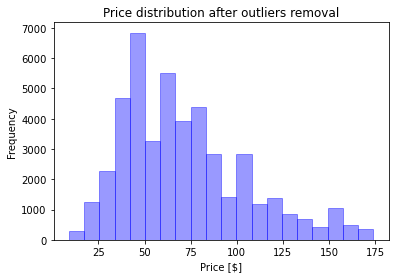

In [54]:
plt.xscale('linear')
#plt.xlim((0, 10))
#plt.ylim((0, 10000))

# seaborn histogram
sns.distplot((df['price_clean']), hist=True, kde=False, bins = 20,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Price distribution after outliers removal')
plt.xlabel('Price [$]')
plt.ylabel('Frequency');

#### Listing description

In [55]:
df['is_description'] = df['description'].notnull().astype(int)

In [56]:
df['is_description'].mean()

0.9761847643556583

The amount of listings without description is very low. This variable is not very interesting as the author believes each listing should have a description.

#### Neighborhood overview

In [57]:
df['is_neighborhood_overview'] = df['neighborhood_overview'].notnull().astype(int)

In [58]:
df['is_neighborhood_overview'].mean()

0.5408152138355179

#### Host has profile picture

In [59]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].notnull().astype(int)

In [60]:
df['host_has_profile_pic'].mean()

0.9995638235229974

Most of the hosts have profile picture, this does not seem a interesting variable

#### Host listings count

In [132]:
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)

#### Host since

We will convert this variable to datetime, then transform in a how long the host has been host

In [61]:
df['host_for_time'] = (pd.to_datetime('2022-03-31') - pd.to_datetime(df['host_since'])).dt.days

In [62]:
df['host_for_time'].describe()

count    45833.000000
mean      1930.145572
std        947.238634
min          4.000000
25%       1232.000000
50%       1998.000000
75%       2635.000000
max       4723.000000
Name: host_for_time, dtype: float64

In [63]:
df['host_for_time'].isnull().value_counts()

False    45833
True        20
Name: host_for_time, dtype: int64

In [64]:
df['host_for_time'].fillna(df['host_for_time'].mean(), inplace = True)

In [65]:
df['host_for_time'].isnull().value_counts()

False    45853
Name: host_for_time, dtype: int64

#### Host information

In [66]:
df.loc[:,'is_host_info'] = df['host_about'].notnull().astype(int)

In [67]:
df['is_host_info'].mean()

0.4186639914509411

#### Host response time

In [68]:
df['host_response_time'].value_counts()

within an hour        20187
within a day           5083
within a few hours     4938
a few days or more     2167
Name: host_response_time, dtype: int64

In [69]:
df['host_response_time'].isnull().sum()

13478

In [70]:
df['host_response_time'].value_counts()

within an hour        20187
within a day           5083
within a few hours     4938
a few days or more     2167
Name: host_response_time, dtype: int64

In [71]:
df[df['host_response_time'].isnull()].head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_clean,is_description,is_neighborhood_overview,host_for_time,is_host_info
5,32631,https://www.airbnb.com/rooms/32631,20220329142659,2022-03-31,Terrazza Salone + free moto parking,Beautiful STUDIO IN CITY CENTER WITH A TERRACE...,"You are in the heart of our city center, full ...",https://a0.muscache.com/pictures/1075160/8e9ba...,131867,https://www.airbnb.com/users/show/131867,Giuseppe,2010-05-25,"Sicily , Italy",SHARE MORE OWN LESS \r\n\r\nSe ragione misteri...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/131867/profil...,https://a0.muscache.com/im/users/131867/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,t,"Trapani, Italy",Trapani,NaN,38.01385,12.50986,Entire home,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Refrigerator"", ""Dishes and silv...",$54.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,365,2022-03-31,154,2,0,2010-08-09,2021-08-17,4.37,4.44,4.56,4.77,4.75,4.68,4.34,NaN,f,1,1,0,0,1.09,54.0,1,1,4328.0,1
7,40182,https://www.airbnb.com/rooms/40182,20220329142659,2022-03-29,Casa Vacanze Hipparis,<b>The space</b><br />In the heart of the hous...,NaN,https://a0.muscache.com/pictures/223307/3bad90...,172482,https://www.airbnb.com/users/show/172482,Francesco,2010-07-19,"Ragusa, Sicilia, Italy","Sono una persona estroversa, a cui piace conos...",NaN,NaN,0%,f,https://a0.muscache.com/im/users/172482/profil...,https://a0.muscache.com/im/users/172482/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",1,f,NaN,Vittoria,NaN,36.89101,14.43056,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Heating"", ""Washer"", ""Long term stays allowed...",$47.00,7,30,7,7,30,30,7.0,30.0,NaN,t,30,60,90,365,2022-03-29,1,0,0,2020-08-16,2020-08-16,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05,47.0,1,0,4273.0,1
12,46486,https://www.airbnb.com/rooms/46486,20220329142659,2022-03-29,"6 km from Siracusa,nature & comfort",<b>The space</b><br />In an ambiance of a simp...,NaN,https://a0.muscache.com/pictures/264695/916a77...,207959,https://www.airbnb.com/users/show/207959,La Frescura,2010-08-21,"Siracusa, Sicily, Italy","Salve, \r\nmi presento, sono Ida!\r\n...diffic...",NaN,NaN,67%,f,https://a0.muscache.com/im/users/207959/profil...,https://a0.muscache.com/im/users/207959/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",1,f,NaN,Siracusa,NaN,37.06906,15.20910,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Heating"", ""Washe...",$105.00,3,730,3,3,730,730,3.0,730.0,NaN,t,30,60,90,365,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN,105.0,1,0,4240.0,1
13,46487,https://www.airbnb.com/rooms/46487,202203291

In [72]:
df[df['host_response_time'].isnull()]['number_of_reviews'].describe()

count    13478.000000
mean         5.593115
std         15.905800
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        489.000000
Name: number_of_reviews, dtype: float64

It is clear there are hosts with high number of reviews but with a "NaN" on "host_response time". We should not penalize them substituting Nan with zero, so we will use the mean instead.

Later we can try to remove it from the model to see if fitting improves.

We will substitute the categorical ordinal variable with a number.
The strategy for host ranking will be to have max score for each feature = 1.
Then we will add the features together so to create a host_score. This way we will ensure we will not overfit.

In [73]:
#this is a bit arbitrary but gives a full score to those that reply amost immediatly
df['host_response_time'].replace('within an hour', 1, inplace = True)
df['host_response_time'].replace('within a few hours', 1/2, inplace = True)
df['host_response_time'].replace('within a day', 1/4, inplace = True)
df['host_response_time'].replace('a few days or more', 1/8, inplace = True) 

In [74]:
df['host_response_time'].fillna(df['host_response_time'].mean(), inplace = True)

In [75]:
df['host_response_time'].value_counts()

1.000000    20187
0.747417    13478
0.250000     5083
0.500000     4938
0.125000     2167
Name: host_response_time, dtype: int64

In [76]:
df['host_response_rate_number'] = df['host_response_rate'].str.replace('%', '.0').astype(float)/100
df['host_response_rate_number'].fillna(0, inplace = True) 

It is decided to fill the NaN with zeros from an analysis of the dataset. In fact, it seems that those who have a Nan are not well performing hosts.

In [77]:
df['host_response_rate_number'].value_counts()

1.00    25560
0.00    15088
0.50      735
0.90      534
0.67      418
0.80      392
0.98      357
0.75      356
0.93      208
0.60      192
0.33      180
0.96      147
0.83      132
0.94      127
0.99      122
0.82      105
0.89      104
0.86      102
0.25       94
0.95       91
0.88       89
0.40       84
0.97       78
0.92       73
0.70       63
0.20       56
0.91       39
0.71       38
0.78       38
0.56       33
0.87       30
0.63       29
0.30       25
0.43       21
0.57       16
0.14       14
0.29       12
0.18       11
0.17        9
0.38        8
0.13        6
0.11        5
0.73        4
0.85        4
0.77        4
0.64        4
0.81        3
0.10        3
0.54        2
0.22        2
0.59        2
0.61        1
0.65        1
0.72        1
0.68        1
Name: host_response_rate_number, dtype: int64

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


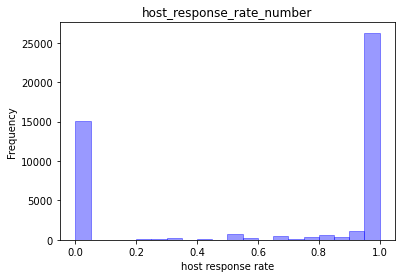

In [78]:
#plt.xscale('linear')
#plt.xlim((0, 10))
#plt.ylim((0, 10000))

# seaborn histogram
sns.distplot((df['host_response_rate_number']), hist=True, kde=False, bins = 20,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('host_response_rate_number')
plt.xlabel('host response rate')
plt.ylabel('Frequency');

In [79]:
df['host_acceptance_rate_number'] = df['host_acceptance_rate'].str.replace('%', '.0').astype(float)/100
df['host_acceptance_rate_number'].fillna(0, inplace = True)

In [80]:
df['host_acceptance_rate_number'].isnull().sum()

0

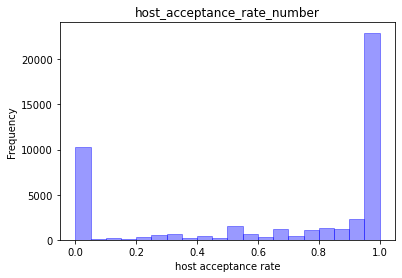

In [81]:
#plt.xscale('linear')
#plt.xlim((0, 10))
#plt.ylim((0, 10000))

# seaborn histogram
sns.distplot((df['host_acceptance_rate_number']), hist=True, kde=False, bins = 20,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('host_acceptance_rate_number')
plt.xlabel('host acceptance rate')
plt.ylabel('Frequency');

In [82]:
df['is_superhost'] = df['host_is_superhost'].replace('f', 0).replace('t', 1).fillna(0)

In [83]:
df['is_superhost'].isnull().sum()

0

In [84]:
for index in df['host_verifications'].index:
    df.loc[index, 'host_verifications_count'] = df.loc[index, 'host_verifications'].count('\'')/2

In [85]:
df['host_verifications_count'].value_counts()

2.0     11693
5.0      7153
3.0      6507
6.0      5305
7.0      5079
8.0      3542
4.0      2551
1.0      2495
9.0      1345
10.0      120
0.0        43
11.0       20
Name: host_verifications_count, dtype: int64

In [86]:
df['host_verifications_count'].isnull().sum()

0

In [87]:
index = 1000
print(df['host_verifications'].iloc[index])
print(df['host_verifications_count'].iloc[index])

['email', 'phone', 'reviews']
3.0


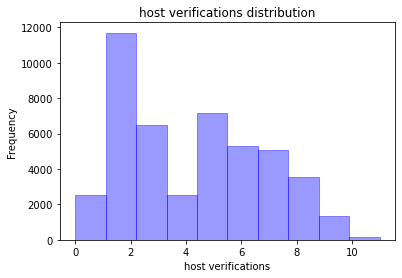

In [88]:
#plt.xscale('linear')
#plt.xlim((0, 10))
#plt.ylim((0, 10000))

# seaborn histogram
sns.distplot((df['host_verifications_count']), hist=True, kde=False, bins = 10,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('host verifications distribution')
plt.xlabel('host verifications')
plt.ylabel('Frequency');

In [89]:
df['instant_bookable'] = df['instant_bookable'].replace('f', 0).replace('t', 1)

### Host performance 

In [90]:
df['is_host_info'].sample(5)

25998    0
3540     1
47028    1
29544    0
5818     0
Name: is_host_info, dtype: int64

In [91]:
df['is_host_identity_verified'] = df['host_identity_verified'].replace('f', 0).replace('t', 1).fillna(0)

We will check the correlation between "host" related variables to assess the risk of overfitting.

<AxesSubplot:>

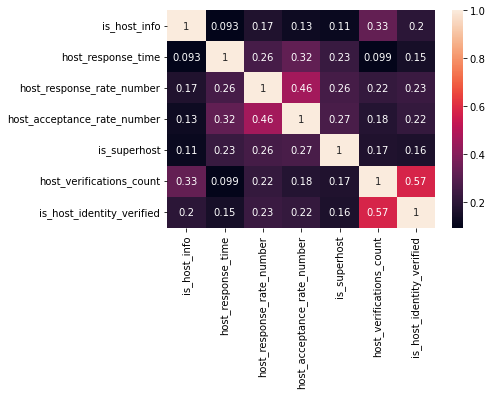

In [92]:
sns.heatmap(df[['is_host_info', 'host_response_time', 'host_response_rate_number', 
                'host_acceptance_rate_number', 'is_superhost', 'host_verifications_count', 
                'is_host_identity_verified']].corr(), annot=True)

1) The only two variables with correlation higher than 0.5 are "is_host_identity_verified" and "host_verifications_count". We should therefore consider removing one from the model so to avoid possible overfitting.

In [93]:
for index in df['amenities'].index:
    df.loc[index, 'amenities_count'] = df.loc[index, 'amenities'].count('\"')/2

In [94]:
index = 1300
print(df['amenities'].iloc[index])
print(df['amenities_count'].iloc[index])

["BBQ grill", "Shampoo", "Patio or balcony", "Long term stays allowed", "Hangers", "Beach essentials", "Hair dryer", "Breakfast", "Lock on bedroom door", "Essentials", "Iron"]
11.0


In [95]:
df['amenities_count'].value_counts()

14.0    1776
13.0    1735
15.0    1713
16.0    1579
12.0    1561
17.0    1529
11.0    1505
18.0    1487
19.0    1379
22.0    1367
21.0    1350
23.0    1339
20.0    1334
10.0    1313
26.0    1301
25.0    1297
24.0    1286
28.0    1190
27.0    1184
29.0    1143
9.0     1025
30.0    1007
31.0     999
32.0     908
33.0     848
8.0      832
34.0     799
35.0     691
36.0     666
37.0     652
7.0      630
38.0     577
39.0     509
6.0      501
40.0     496
41.0     452
42.0     415
43.0     397
5.0      358
44.0     354
45.0     303
46.0     280
47.0     268
48.0     226
4.0      199
49.0     195
50.0     157
51.0     154
52.0     141
1.0      133
3.0      114
53.0     107
55.0     102
54.0      91
57.0      66
56.0      62
47.5      61
2.0       60
44.5      60
42.5      59
39.5      58
43.5      55
41.5      51
36.5      51
58.0      51
37.5      50
45.5      50
34.5      49
38.5      45
40.5      44
48.5      43
49.5      41
50.5      41
61.0      39
54.5      37
46.5      35
32.5      35

In [96]:
df[df['amenities_count'] == 57]['amenities'].iloc[0]

'["Sound system", "Washer", "Room-darkening shades", "Heating", "Private patio or balcony", "Long term stays allowed", "High chair", "Pocket wifi", "Portable fans", "Cooking basics", "Cleaning products", "TV", "Pack \\u2019n play/Travel crib", "Freezer", "Wine glasses", "Essentials", "Iron", "First aid kit", "Dining table", "Hot water", "Refrigerator", "Host greets you", "Stove", "Bathtub", "Dedicated workspace", "Drying rack for clothing", "Fireplace guards", "Wifi", "Single level home", "Air conditioning", "Board games", "Body soap", "Dishes and silverware", "Crib", "Luggage dropoff allowed", "Baby bath", "Private fenced garden or backyard", "Extra pillows and blankets", "Hair dryer", "Baking sheet", "Bed linens", "Children\\u2019s books and toys", "Barbecue utensils", "Kitchen", "Shampoo", "BBQ grill", "Free parking on premises", "Free street parking", "Indoor fireplace", "Oven", "Hangers", "Outdoor shower", "Bidet", "Microwave", "Clothing storage", "Private entrance", "Ethernet con

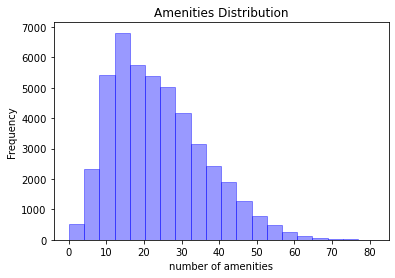

In [97]:
# seaborn histogram
sns.distplot((df['amenities_count']), hist=True, kde=False, bins = 20,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Amenities Distribution')
plt.xlabel('number of amenities')
plt.ylabel('Frequency');

Possibly the number of amenities is misinterpreted by some hosts?
Is a "Single level home" and amenity? And how about "Hot water"?
I should try to remove it from the model as it seems the number of amenities is pretty arbitrary.

In [98]:
# check result for "host_identity_verified" modification
index = [10, 499, 238]
print(df['host_identity_verified'].loc[index])
print(df['is_host_identity_verified'].loc[index])

10     t
499    f
238    t
Name: host_identity_verified, dtype: object
10     1.0
499    0.0
238    1.0
Name: is_host_identity_verified, dtype: float64


In [99]:
df['room_type'].value_counts()

Entire home/apt    36712
Private room        8577
Hotel room           480
Shared room           84
Name: room_type, dtype: int64

In [100]:
df['room_type'].isnull().sum()

0

In [101]:
one_hot = pd.get_dummies(df['room_type']) # hot-encode room type

In [102]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45853 entries, 1 to 51116
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Entire home/apt  45853 non-null  uint8
 1   Hotel room       45853 non-null  uint8
 2   Private room     45853 non-null  uint8
 3   Shared room      45853 non-null  uint8
dtypes: uint8(4)
memory usage: 1.5 MB


In [103]:
df = pd.get_dummies(df, columns=['room_type'])

In [104]:
df['bathrooms_text'][10] == ''

False

In [105]:
df['bathrooms_text'].value_counts()

1 bath               27122
2 baths               6897
1 private bath        5657
1.5 baths             2381
1 shared bath         1183
3 baths                934
2.5 baths              578
2 shared baths         222
4 baths                201
1.5 shared baths       115
5 baths                 89
3.5 baths               72
6 baths                 39
0 baths                 32
4.5 baths               30
3 shared baths          28
0 shared baths          26
Shared half-bath        21
Half-bath               19
7 baths                 15
2.5 shared baths        14
5.5 baths               13
4 shared baths          12
5 shared baths           7
Private half-bath        6
10 baths                 6
8 baths                  5
5.5 shared baths         4
6.5 baths                4
8.5 baths                2
3.5 shared baths         2
7.5 baths                2
4.5 shared baths         2
10.5 baths               1
10 shared baths          1
13.5 baths               1
9 baths                  1
8

In [106]:
df['bathrooms_text'].replace(np.nan, '', regex=True, inplace = True)

In [107]:
range(len(df['bathrooms_text']))

range(0, 45853)

In [108]:
df['bathrooms_clean'] = np.nan

In [109]:
for index in range(len(df['bathrooms_text'])):  
    string = df['bathrooms_text'].iloc[index]
    #print(string)
    if bool(re.search(r'\d', string)) == True:
        df['bathrooms_clean'].iloc[index] = float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", string)[0])
    elif re.search('alf-bath', string):
        df['bathrooms_clean'].iloc[index] = 0.5
    elif string == '':
        string = string

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
df['bathrooms_clean'].fillna(df['bathrooms_clean'].mean(), inplace = True)

In [111]:
df['bathrooms_clean'].value_counts()

1.000000     33962
2.000000      7119
1.500000      2496
3.000000       962
2.500000       592
4.000000       213
1.284509       104
5.000000        96
3.500000        74
0.000000        58
0.500000        46
6.000000        39
4.500000        32
5.500000        17
7.000000        16
10.000000        7
8.000000         6
6.500000         4
7.500000         2
9.000000         2
8.500000         2
9.500000         1
13.500000        1
10.500000        1
30.000000        1
Name: bathrooms_clean, dtype: int64

In [112]:
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace = True)

#### Bathrooms normalized
the number of bathrooms might not indicate a special feature, as it will be very high for 

In [113]:
df['bathrooms_normalized'] = df['bathrooms_clean']/df['bedrooms']

#### Reviews per month

In [114]:
df['reviews_per_month_clean'] = df['reviews_per_month'].fillna(0)

In [115]:
df['reviews_per_month_clean'].isnull().sum()

0

#### Review scores rating

In [116]:
df['review_scores_rating'].isnull().sum()

13970

In [117]:
df['review_scores_rating'].replace(np.nan, 0, inplace = True)

In [118]:
df['review_scores_rating'].isnull().sum()

0

In [119]:
#df.info()

These are the columns that we will keep for the model

In [120]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_a

#### create a new dataset with reduced number of columns

In [134]:
# reduce the number of columns of the dataframe for easier handing
df_red = df[['number_of_reviews', 'host_listings_count',
       'number_of_reviews_ltm','review_scores_rating','instant_bookable',
       'reviews_per_month', 
       'price_clean', 'is_description', 'is_neighborhood_overview',
       'host_for_time', 'is_host_info', 'host_response_rate_number',
       'host_acceptance_rate_number', 'is_superhost',
       'host_verifications_count', 'is_host_identity_verified',
       'amenities_count', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'bathrooms_normalized', 'reviews_per_month_clean', 'bedrooms', 'accommodates']]

<AxesSubplot:>

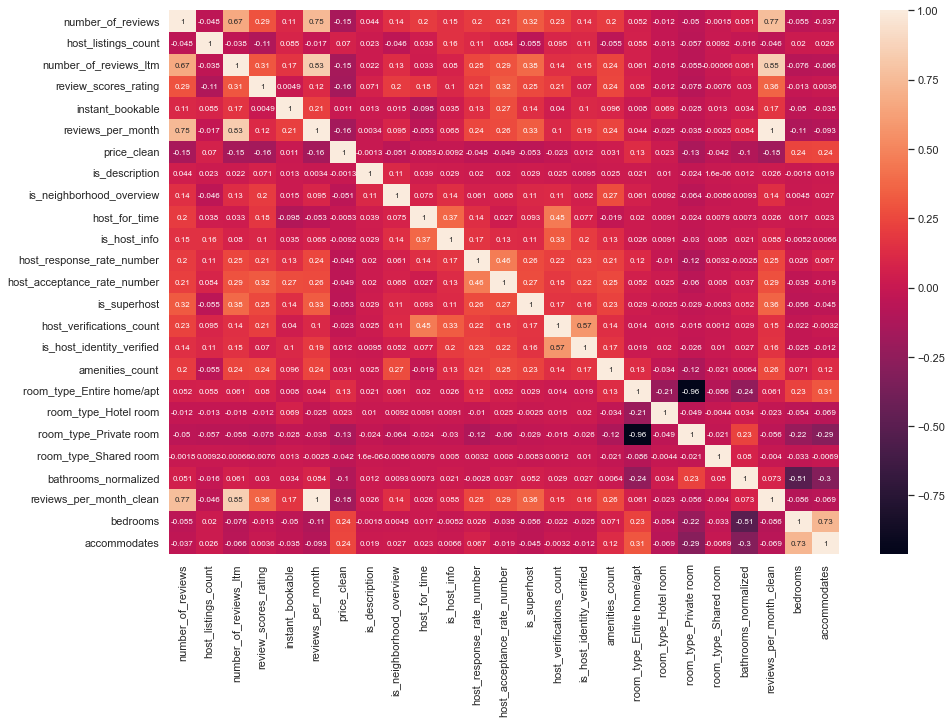

In [135]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_red.corr(), annot = True, annot_kws={'size': 8})
#sns.set(font_scale=2) # font size 2

- Accommodates, bedrooms and beds are quite correlated
- also the "host_response_rate_number" is correlated with "host response time", negatively and makes sense. So we could define a variable that comprises the two.

## 2.7 Cleaning and prep Conclusion

We select some variables that seem to have consistency between all listings and should be related to the success of the listing. They will be defined in the modelling section.

The KPI will be the number of reviews for the last twelve months ("number_of_reviews_ltm"). Considering this will be dependent on the size of the structure, we will normalize it by the number of people that the structure can accommodate ("accommodates").

### Wordcloud

this idea comes from
https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

Now, let's plot a wordcloud with neighbourhood names.

I will use it later for the Medium article.

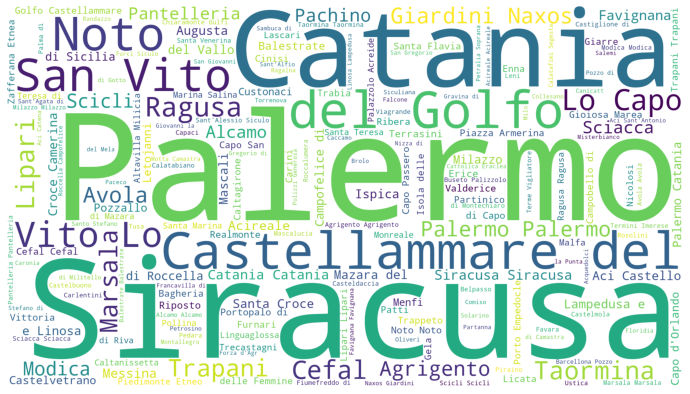

In [136]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.subplots(figsize=(15,7))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood_cleansed))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

# 3. Modelling

In [137]:
df_red['intercept'] = 1

/var/folders/gc/yt6k1wpx4zz1v70vzfj3pd7m0000gn/T/ipykernel_4215/2476141848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['intercept'] = 1


In [138]:
df_fit = df_red.drop(['number_of_reviews', 'reviews_per_month', 'is_description',
                      'reviews_per_month_clean', 'room_type_Shared room'], axis = 1)

In [139]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45853 entries, 1 to 51116
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          45853 non-null  float64
 1   number_of_reviews_ltm        45853 non-null  int64  
 2   review_scores_rating         45853 non-null  float64
 3   instant_bookable             45853 non-null  int64  
 4   price_clean                  45853 non-null  float64
 5   is_neighborhood_overview     45853 non-null  int64  
 6   host_for_time                45853 non-null  float64
 7   is_host_info                 45853 non-null  int64  
 8   host_response_rate_number    45853 non-null  float64
 9   host_acceptance_rate_number  45853 non-null  float64
 10  is_superhost                 45853 non-null  float64
 11  host_verifications_count     45853 non-null  float64
 12  is_host_identity_verified    45853 non-null  float64
 13  amenities_count 

#### Import libraries

In [140]:
import statsmodels.api as sms; # import statsmodel library
from sklearn.model_selection import train_test_split # import test/train dataset split from sklearn

### 3.1 Ordinary Least Squares model

In [141]:
x = df_fit.drop(['number_of_reviews_ltm', 'review_scores_rating',
                 'amenities_count', 'host_verifications_count', 'bedrooms'], axis = 1) # Define features
y = df_fit['number_of_reviews_ltm']/df_fit['accommodates'] # define dependent variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=3) #split Test and Training Set
lm = sms.OLS(y_train,x_train)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     586.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:14:14   Log-Likelihood:                -82871.
No. Observations:               36682   AIC:                         1.658e+05
Df Residuals:                   36666   BIC:                         1.659e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_listings_count            -0.0009      0.000     -7.933      0.000      -0.001      -0.001
instant_bookable                0.3355      0.026     13.130      0.000       0.285       0.386
price_clean                    -0.0087      0.000    -22.716      0.000      -0.009      -0.008
is_neighborhood_overview        0.3052      0.025     12.312      0.000       0.257       0.354
host_for_time               -1.367e-05    1.4e-05     -0.976      0.329   -4.11e-05    1.38e-05
is_host_info                    0.0481      0.027      1.753      0.080      -0.006       0.102
host_response_rate_number       0.4623      0.031     15.033      0.000       0.402       0.523
host_acceptance_rate_number     0.6618      0.035     19.013      0.000       0.594       0.730
is_superhost                    1.6018      0.035     46.074      0.000       1.534       1.670
is_host_identity_verified       0.2389      0.027      8.757      0.000       0.185       0.292
room_type_Entire home/apt       0.6125      0.277      2.211      0.027       0.070       1.155
room_type_Hotel room           -0.0475      0.301     -0.158      0.874      -0.637       0.542
room_type_Private room          0.3459      0.278      1.246      0.213      -0.198       0.890
bathrooms_normalized            0.3008      0.041      7.428      0.000       0.221       0.380
accommodates                   -0.2008      0.007    -29.252      0.000      -0.214      -0.187
intercept                       0.1285      0.287      0.448      0.654      -0.434       0.691
==============================================================================
Omnibus:                    42479.920   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5621673.253
Skew:                           6.058   Prob(JB):                         0.00
Kurtosis:                      62.425   Cond. No.                     9.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.1 Comments
- the R2 value is around 0.2 hence the model is not quite able to explain the amount of variability in the response variable.
- nevertheless the p-value, in some cases, is below 0.05 hence some variables have statistical significance.

### 3.2 Ordinary Least Squares model - Reduction of skewness by filtering
We will filter the data so to consider only the listings with more than 1 review per month (i.e. more than 12 reviews in the last twelve months

In [142]:
df_fit2 = df_fit[df['number_of_reviews_ltm'] > 12] # reduce the dataframe based on having more that one review per month
x = df_fit2.drop(['number_of_reviews_ltm', 'review_scores_rating', 'amenities_count',
                 'host_verifications_count', 'bedrooms'], axis = 1)
y = df_fit2['number_of_reviews_ltm']/df_fit2['accommodates']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=3) #split Test and Training Set
lm = sms.OLS(y_train,x_train)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     87.13
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.43e-213
Time:                        09:16:28   Log-Likelihood:                -7177.1
No. Observations:                2408   AIC:                         1.439e+04
Df Residuals:                    2392   BIC:                         1.448e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_listings_count            -0.0044      0.002     -2.444      0.015      -0.008      -0.001
instant_bookable                0.9936      0.234      4.245      0.000       0.535       1.453
price_clean                    -0.0144      0.004     -3.519      0.000      -0.022      -0.006
is_neighborhood_overview        0.4825      0.224      2.159      0.031       0.044       0.921
host_for_time               -7.859e-05      0.000     -0.670      0.503      -0.000       0.000
is_host_info                    0.2898      0.216      1.342      0.180      -0.134       0.713
host_response_rate_number       2.0093      0.618      3.250      0.001       0.797       3.222
host_acceptance_rate_number    -2.0543      1.139     -1.804      0.071      -4.288       0.179
is_superhost                   -0.0418      0.209     -0.200      0.842      -0.451       0.368
is_host_identity_verified       1.2339      0.318      3.876      0.000       0.610       1.858
room_type_Entire home/apt      -4.4975      2.246     -2.003      0.045      -8.901      -0.094
room_type_Hotel room           -3.2045      2.549     -1.257      0.209      -8.204       1.795
room_type_Private room         -3.2894      2.254     -1.459      0.145      -7.710       1.131
bathrooms_normalized            0.1668      0.348      0.479      0.632      -0.516       0.849
accommodates                   -1.8302      0.064    -28.378      0.000      -1.957      -1.704
intercept                      17.7716      2.591      6.859      0.000      12.691      22.853
==============================================================================
Omnibus:                     1177.679   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7776.827
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      10.577   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2 Comments
Reducing the number of observations to those with more than 1 review per month improves significantly the capability of predicting the number of reviews even if R2 remains around 0.35.

### 3.3 Ordinary Least Squares - fitting the log(y)
Filtering to a number of reviews > 0 allows to apply log to the dependent variable.
It is a technique that allows to give to skewed data a normal like distribution.

/Users/saveriotufano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


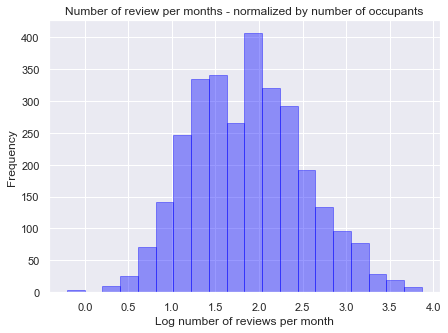

In [143]:
sns.set(rc={'figure.figsize':(7,5)})
y = np.log(df_fit2['number_of_reviews_ltm']/df_fit2['accommodates'])
# seaborn histogram
sns.distplot(y, hist=True, kde=False, bins = 20,
             color = 'blue',
             hist_kws={'edgecolor':'blue'})

# Add labels
plt.title('Number of review per months - normalized by number of occupants')
plt.xlabel('Log number of reviews per month')
plt.ylabel('Frequency');

In [152]:
#Defining the independent variables and dependent variables
x = df_fit2.drop(['number_of_reviews_ltm', 'review_scores_rating', 'amenities_count', 'host_verifications_count', 'bedrooms'], axis = 1)
#y = df_fit['number_of_reviews_ltm'] * df_red['review_scores_rating']
y = np.log(df_fit2['number_of_reviews_ltm']/df_fit2['accommodates'])
# y = df_red['review_scores_rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=3) #split Test and Training Set
lm = sms.OLS(y_train,x_train)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:                -1353.4
No. Observations:                2408   AIC:                             2739.
Df Residuals:                    2392   BIC:                             2831.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_listings_count            -0.0005      0.000     -3.272      0.001      -0.001      -0.000
instant_bookable                0.1066      0.021      5.112      0.000       0.066       0.147
price_clean                    -0.0014      0.000     -3.714      0.000      -0.002      -0.001
is_neighborhood_overview        0.0509      0.020      2.559      0.011       0.012       0.090
host_for_time               -1.233e-05   1.05e-05     -1.180      0.238   -3.28e-05    8.16e-06
is_host_info                    0.0379      0.019      1.972      0.049       0.000       0.076
host_response_rate_number       0.2302      0.055      4.180      0.000       0.122       0.338
host_acceptance_rate_number    -0.1007      0.101     -0.992      0.321      -0.300       0.098
is_superhost                    0.0002      0.019      0.009      0.993      -0.036       0.037
is_host_identity_verified       0.1126      0.028      3.970      0.000       0.057       0.168
room_type_Entire home/apt      -0.4645      0.200     -2.322      0.020      -0.857      -0.072
room_type_Hotel room           -0.3881      0.227     -1.710      0.087      -0.833       0.057
room_type_Private room         -0.3938      0.201     -1.962      0.050      -0.787      -0.000
bathrooms_normalized            0.0405      0.031      1.306      0.192      -0.020       0.101
accommodates                   -0.2653      0.006    -46.198      0.000      -0.277      -0.254
intercept                       3.0176      0.231     13.077      0.000       2.565       3.470
==============================================================================
Omnibus:                      156.776   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.192
Skew:                           0.685   Prob(JB):                     1.36e-41
Kurtosis:                       2.968   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.1 Comments
The predictive capability of the model is now clearly improved to R2 = 0.57

# Now plot the correlation chart

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#10.-Diverging-Bars

In [150]:
np.exp(results.params)

host_listings_count             0.999476
instant_bookable                1.112444
price_clean                     0.998644
is_neighborhood_overview        1.052257
host_for_time                   0.999988
is_host_info                    1.038664
host_response_rate_number       1.258807
host_acceptance_rate_number     0.904246
is_superhost                    1.000159
is_host_identity_verified       1.119144
room_type_Entire home/apt       0.628470
room_type_Hotel room            0.678315
room_type_Private room          0.674490
bathrooms_normalized            1.041303
accommodates                    0.766939
intercept                      20.442289
dtype: float64